<a href="https://colab.research.google.com/github/Aadhlll/YOLO/blob/main/Ultralytics_YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Detect and Count Objects in Zone

---

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv5
- Install YOLOv8
- Install Supervision
**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Aug 17 16:13:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov5


## Install YOLOv5

In [ ]:
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/Aadhlll/YOLO

%cd {HOME}/yolov5
!pip install -r requirements.txt

from IPython import display
display.clear_output()

## Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


## Install Detectron2

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

detectron2: 0.6


## Install Supervision

In [ ]:
!pip install supervision==0.2.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.2.0


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 226MB/s]


**NOTE:** Let's start vanilla YOLOv8 inference pipeline.


0: 384x640 15 persons, 2 trains, 3 benchs, 2 backpacks, 1 handbag, 1 suitcase, 11.4ms
Speed: 4.1ms preprocess, 11.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


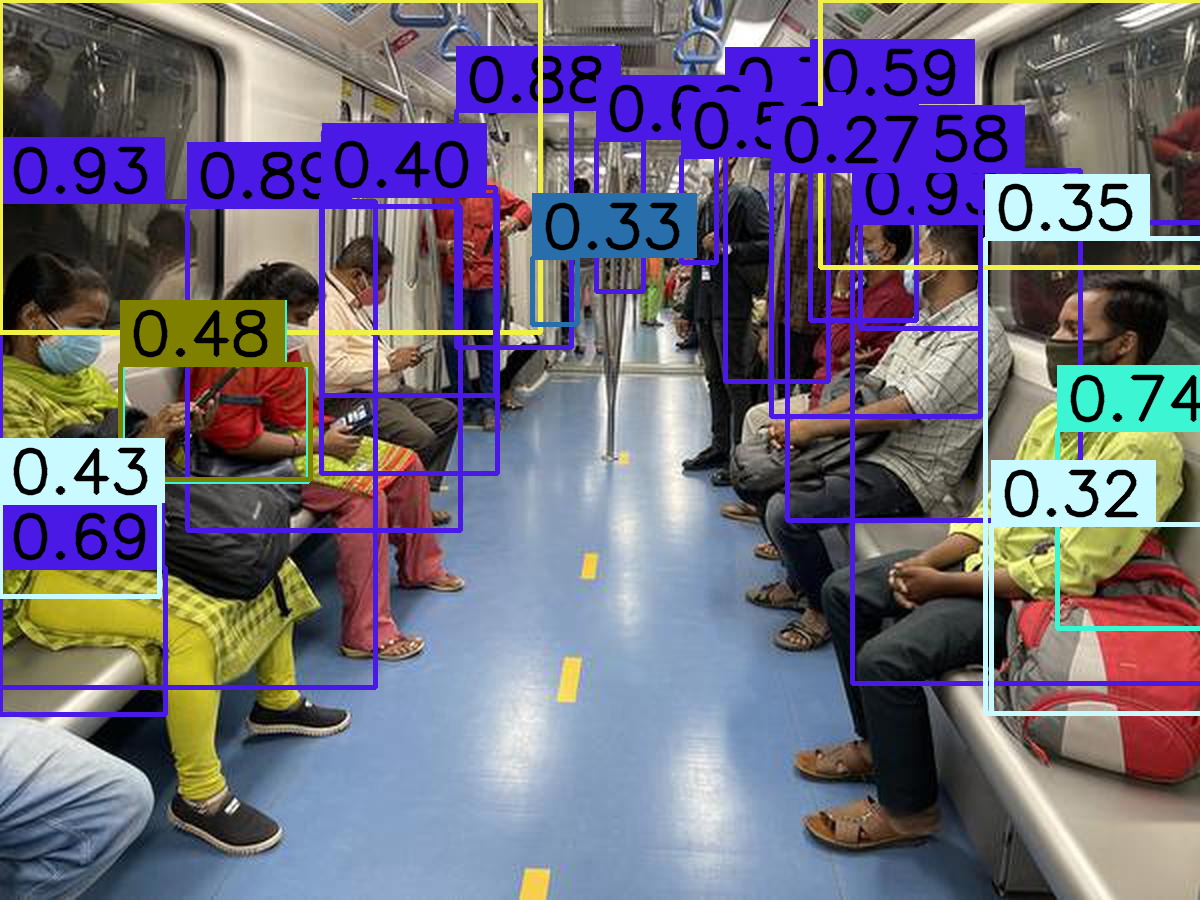

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import supervision as sv

# Load your uploaded image
uploaded_image_path = "/content/YOLO/YOLO_METRO/MetroRail.jpg"  # Replace with the actual path
uploaded_image = cv2.imread(uploaded_image_path)
uploaded_image_rgb = cv2.cvtColor(uploaded_image, cv2.COLOR_BGR2RGB)

# Convert the image to a format suitable for detection
uploaded_image_resized = cv2.resize(uploaded_image_rgb, (1280, 720))  # Resize to match your model's input size

# Detect using your model
results = model(uploaded_image_resized)[0]  # Assuming your model doesn't require imgsz argument
detections = sv.Detections.from_yolov8(results)

# Annotate the original image
annotated_image = uploaded_image_rgb.copy()
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)

# Convert the annotated image back to BGR format for display
annotated_image_bgr = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

# Display the annotated image using Google Colab's cv2_imshow
cv2_imshow(annotated_image_bgr)



0: 384x640 11 persons, 43.0ms
Speed: 2.6ms preprocess, 43.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


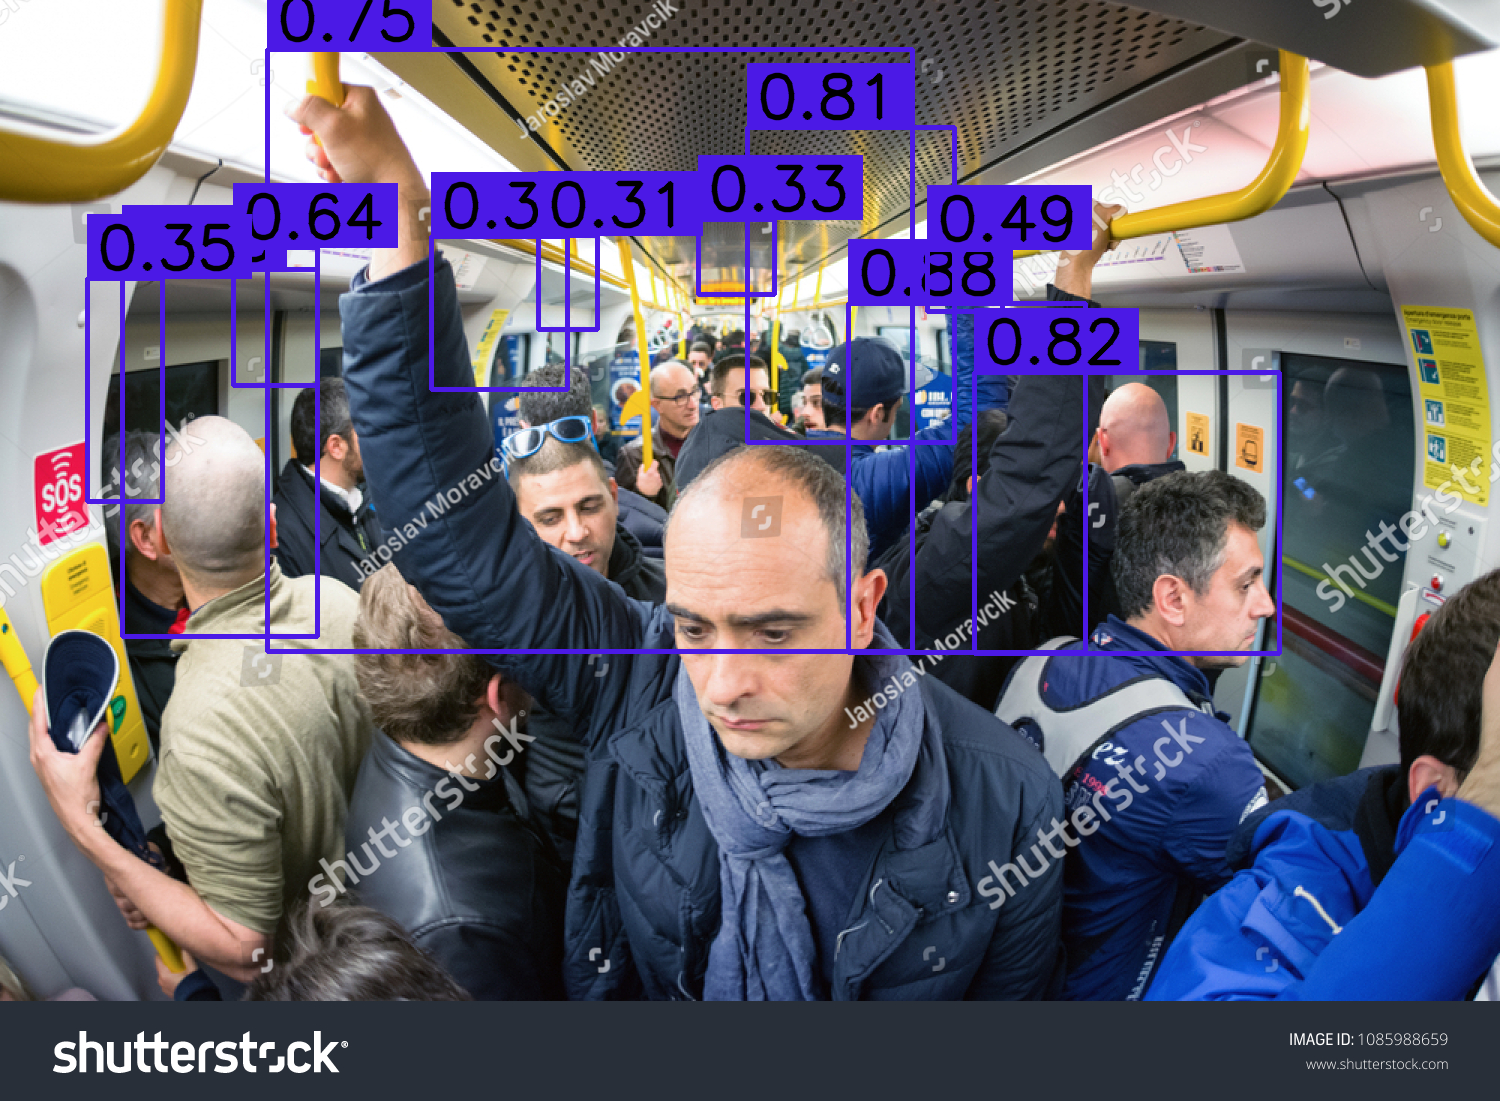

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import supervision as sv

# Load your uploaded image
uploaded_image_path = "/content/YOLO/YOLO_METRO/metro2.jpg"  # Replace with the actual path
uploaded_image = cv2.imread(uploaded_image_path)
uploaded_image_rgb = cv2.cvtColor(uploaded_image, cv2.COLOR_BGR2RGB)

# Convert the image to a format suitable for detection
uploaded_image_resized = cv2.resize(uploaded_image_rgb, (1280, 720))  # Resize to match your model's input size

# Detect using your model
results = model(uploaded_image_resized)[0]  # Assuming your model doesn't require imgsz argument
detections = sv.Detections.from_yolov8(results)

# Annotate the original image
annotated_image = uploaded_image_rgb.copy()
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)

# Convert the annotated image back to BGR format for display
annotated_image_bgr = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

# Display the annotated image using Google Colab's cv2_imshow
cv2_imshow(annotated_image_bgr)



0: 384x640 12 persons, 1 backpack, 21.9ms
Speed: 2.4ms preprocess, 21.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


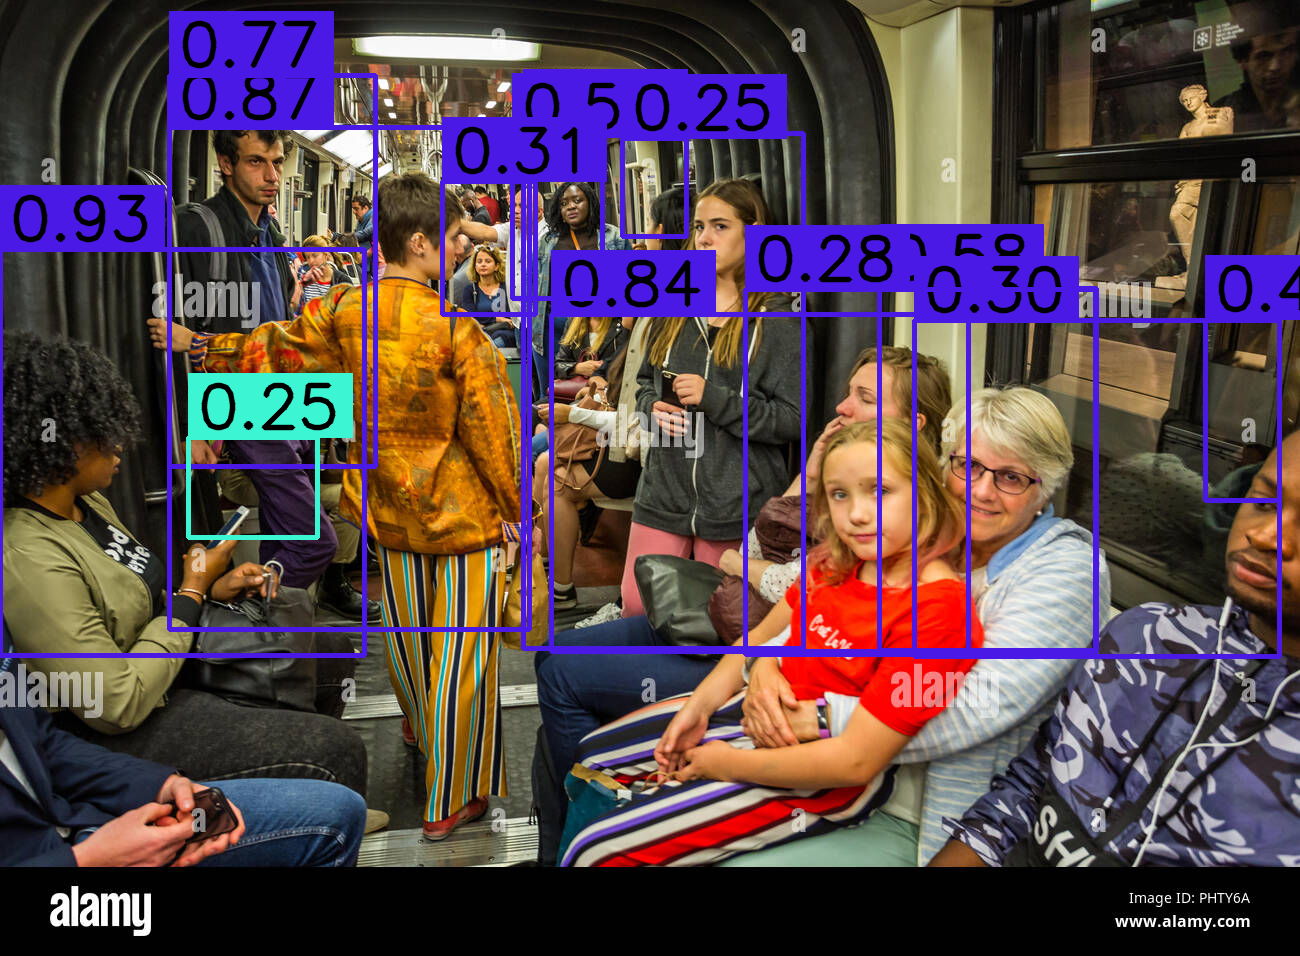

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import supervision as sv

# Load your uploaded image
uploaded_image_path = "/content/YOLO/YOLO_METRO/metro3.jpg"  # Replace with the actual path
uploaded_image = cv2.imread(uploaded_image_path)
uploaded_image_rgb = cv2.cvtColor(uploaded_image, cv2.COLOR_BGR2RGB)

# Convert the image to a format suitable for detection
uploaded_image_resized = cv2.resize(uploaded_image_rgb, (1280, 720))  # Resize to match your model's input size

# Detect using your model
results = model(uploaded_image_resized)[0]  # Assuming your model doesn't require imgsz argument
detections = sv.Detections.from_yolov8(results)

# Annotate the original image
annotated_image = uploaded_image_rgb.copy()
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)

# Convert the annotated image back to BGR format for display
annotated_image_bgr = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

# Display the annotated image using Google Colab's cv2_imshow
cv2_imshow(annotated_image_bgr)
